In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spy = pd.read_csv(r"C:\Users\Emilie Berger\Downloads\SPY.csv", index_col=0, parse_dates=True)
spy.head()

Open        High         Low       Close  Adj Close  \
Date                                                                    
2010-01-04  112.370003  113.389999  111.510002  113.330002  92.246048   
2010-01-05  113.260002  113.680000  112.849998  113.629997  92.490204   
2010-01-06  113.519997  113.989998  113.430000  113.709999  92.555328   
2010-01-07  113.500000  114.330002  113.180000  114.190002  92.946060   
2010-01-08  113.889999  114.620003  113.660004  114.570000  93.255348   

               Volume  
Date                   
2010-01-04  118944600  
2010-01-05  111579900  
2010-01-06  116074400  
2010-01-07  131091100  
2010-01-08  126402800

In [4]:
spy['SPY'] = spy['Close'].pct_change(1) #--> 'SPY' because to be joined with other df later

In [5]:
# S&P 500 stocks, index since contains stock from sp500 index
index = pd.read_csv(r"C:\Users\Emilie Berger\Downloads\sp500sub.csv", index_col=0, parse_dates=True)
index.head()

Open   High    Low  Close  Adj Close     Volume  Name
Date                                                              
2010-01-04   9.22   9.51   9.17   9.50       9.50  1865400.0  INCY
2010-01-05   9.51  10.29   9.45  10.27      10.27  7608900.0  INCY
2010-01-06  10.38  11.09  10.35  11.00      11.00  8046700.0  INCY
2010-01-07  11.00  11.06  10.62  10.82      10.82  3680300.0  INCY
2010-01-08  10.82  11.00  10.75  10.94      10.94  1529300.0  INCY

In [8]:
aapl = index[index['Name'] == 'AAPL'].copy()
aapl.head()

Open       High        Low      Close  Adj Close  \
Date                                                                
2010-01-04  30.490000  30.642857  30.340000  30.572857  26.466835   
2010-01-05  30.657143  30.798571  30.464285  30.625713  26.512596   
2010-01-06  30.625713  30.747143  30.107143  30.138571  26.090879   
2010-01-07  30.250000  30.285715  29.864286  30.082857  26.042646   
2010-01-08  30.042856  30.285715  29.865715  30.282858  26.215786   

                 Volume  Name  
Date                           
2010-01-04  123432400.0  AAPL  
2010-01-05  150476200.0  AAPL  
2010-01-06  138040000.0  AAPL  
2010-01-07  119282800.0  AAPL  
2010-01-08  111902700.0  AAPL

In [9]:
aapl['AAPL'] = aapl['Close'].pct_change(1) #--> 'AAPL' because to be joined with other df later

In [12]:
joined = aapl[['AAPL']].join(spy['SPY'])
joined.head()

AAPL       SPY
Date                          
2010-01-04       NaN       NaN
2010-01-05  0.001729  0.002647
2010-01-06 -0.015906  0.000704
2010-01-07 -0.001849  0.004221
2010-01-08  0.006648  0.003328

<AxesSubplot:xlabel='Date'>

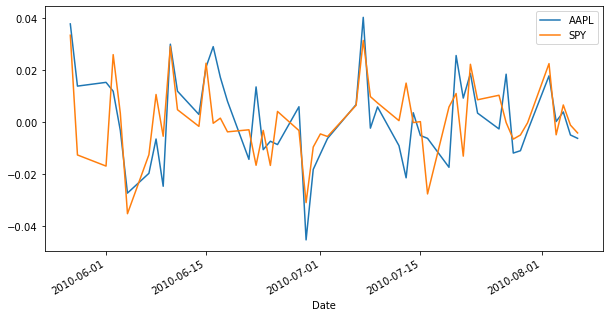

In [13]:
# plot df as time series from rows 100 to 150 randomly --> easier to see a clear pattern (smaller subset)
# close returns, seems to be on same scale
joined.iloc[100:150].plot(figsize=(10, 5))

<AxesSubplot:xlabel='SPY', ylabel='AAPL'>

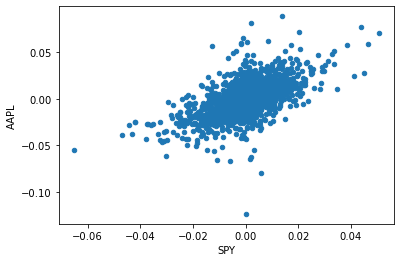

In [14]:
joined.plot.scatter('SPY', 'AAPL')
# correlation doesn't seem to be as strong as it looks on above plot

In [16]:
# make the dataset
# filter out SPY and AAPL
# convert data into numpy arrays
joined.dropna(inplace=True)
X = joined[['SPY']].to_numpy()
Y = joined[['AAPL']].to_numpy()

In [18]:
X.shape, Y.shape # --> Nx1 2 dimensional arrays

((2262, 1), (2262, 1))

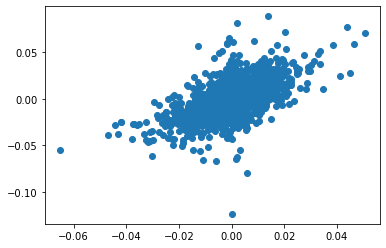

In [20]:
plt.scatter(X, Y) # same scatter plot, just in a different format

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

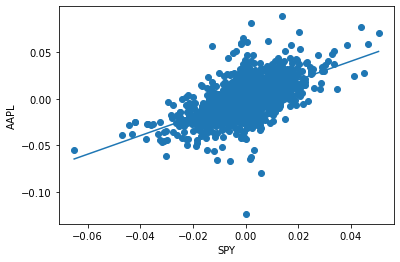

In [23]:
# scatter plot again along with line of best fit
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1) # 5 random point --> min-->max, reshape to Nx1
Y_predict = model.predict(X_predict)

plt.scatter(X, Y)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.plot(X_predict, Y_predict)

In [24]:
beta = model.coef_ #slope
alpha = model.intercept_ #intercept
alpha, beta

# alpha very slightly positive
# beta approximately 1 --> close returns between aapl and spy

(array([0.00046298]), array([[0.99836387]]))

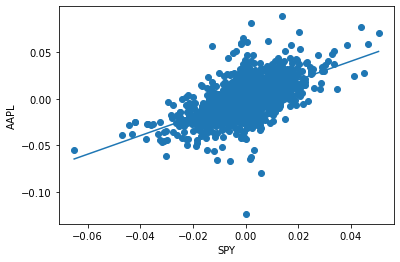

In [26]:
# Manual calculation

Y_predict = beta * X_predict + alpha

plt.scatter(X, Y)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.plot(X_predict, Y_predict)

# --> same plot

In [27]:
# is it best to invest in Apple than in the market as positive alpha
# However another important finance aspect --> risk, volatility
# common measure = standard deviataion

joined.std()

# volatilty of Apple is about twice of the market's
# Apple had better returns but also higher volatility
# common pattern in finance, hgigher rewards --> more risks

AAPL    0.016201
SPY     0.009430
dtype: float64

In [28]:
joined['AAPL'].std() / joined['SPY'].std()

1.717963236040379